In [1]:
# No Colab alterar o tipo de ambiente de execução para a versão 3.11 do python para funcionar o pycaret (atualmente o Colab utiliza a versão 3.12)
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pmdarima to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.9 M

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Estação metereológica CRHEA**

*   **Nome:** CRHEA
*   **Tipo:** Meteorológica
*   **Data da instalação:**
*   **Local da instalação:** CRHEA
*   **Bacia:**
*   **Latitude:** 22 01'22"S (-22.022777777778)
*   **Longitude:** 43 57'38"W (-43.960555555556)
*   **Altitude:** 733m
*   **Cobertura do solo:** Pasto

## 1. Coleta de Dados

Esse dataset possui as leituras automáticas realizadas no período de **01/01/1980 à 30/09/2025**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o arquivo no Google Drive
caminho_arquivo = "/content/drive/MyDrive/datasets/CRHEA/CRHEA_1980-2025.xls"
df = pd.read_excel(caminho_arquivo)

# Removendo variáveis desnecessárias
df.drop(['mm', 'piche'], axis=1, inplace=True)

# Criando variáveis de data, precipitação e temperatura
variavel_data = 'data'
variavel_precipitacao = 'rain'
variavel_temperatura = 'tmean'

# Tratamento
df = df.replace("*", np.nan)
df = df.replace("**", np.nan)
df = df.replace("***", np.nan)
df = df.replace("****", np.nan)
df = df.replace("*****", np.nan)
df = df.replace("******", np.nan)
df = df.replace("*******", np.nan)
df = df.replace("********", np.nan)
df = df.replace("xxx", np.nan)
df = df.replace("xxxx", np.nan)
df = df.replace("-", np.nan)
df = df.replace("9,5*", np.nan)
df = df.replace("Média", np.nan)
df = df.replace("28..5", 28.5)
df = df.replace("32,,1", 32.1)
df = df.replace("2..95", 2.95)
df = df.replace("7,08/", 7.08)
df = df.replace("4..61", 4.61)
df = df.replace("4,,93", 4.93)
df = df.replace("5,0,6", np.nan)
df = df.replace("Transb", np.nan)
df = df.replace(" -", np.nan)
df = df.replace("155,3+", np.nan)


df

,yr,doy,tmax,tmin,tmean,tdavg,Wtmax,Wtmin,wsp05,wsp2,wsp10,evapA,evapS,rain,rad,insol,press,rh
0,1980,1,26.0,17.6,21.80,22.1,NaN,NaN,NaN,NaN,NaN,4.26,NaN,0.0,370.18,05:00:00,NaN,69
1,1980,2,25.8,14.8,20.30,21.8,34,15,5.92,7.12,NaN,NaN,NaN,0.0,600.29,11:20:00,NaN,59.25
2,1980,3,27.2,13.2,20.20,22.4,28,12,3.36,3.57,NaN,7.12,NaN,0.0,610.29,11:50:00,NaN,42.5
3,1980,4,30.2,11.4,20.80,24,31,12,NaN,NaN,NaN,6.98,NaN,0.0,600.29,11:10:00,NaN,47.25
4,1980,5,31.0,14.2,22.60,25.2,NaN,NaN,NaN,NaN,NaN,6.98,NaN,0.0,600.29,09:05:00,NaN,50.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,2025,269,27.1,12.1,19.60,20.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,321.800544,NaN,933.4,68.5
16706,2025,270,30.3,14.9,22.60,77.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,334.042956,NaN,931.3,59
16707,2025,271,33.7,18,25.85,26.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,321.800544,NaN,929.4,48.5
16708,2025,272,34.4,17.9,26.15,25.72,35.2,17.2,1.42,1.95,5.75,3.54,3.5,0.0,319.468656,08:30:00,927.8,57.5


In [ ]:
# Cria a coluna de data
df[variavel_data] = pd.to_datetime(df["yr"].astype(str) + df["doy"].astype(str).str.zfill(3), format="%Y%j")

df = df.set_index(variavel_data)

# Ordena por data
df = df.sort_values(variavel_data)

df

,yr,doy,tmax,tmin,tmean,tdavg,Wtmax,Wtmin,wsp05,wsp2,wsp10,evapA,evapS,rain,rad,insol,press,rh
data,,,,,,,,,,,,,,,,,,
1980-01-01,1980,1,26.0,17.6,21.80,22.1,NaN,NaN,NaN,NaN,NaN,4.26,NaN,0.0,370.18,05:00:00,NaN,69
1980-01-02,1980,2,25.8,14.8,20.30,21.8,34,15,5.92,7.12,NaN,NaN,NaN,0.0,600.29,11:20:00,NaN,59.25
1980-01-03,1980,3,27.2,13.2,20.20,22.4,28,12,3.36,3.57,NaN,7.12,NaN,0.0,610.29,11:50:00,NaN,42.5
1980-01-04,1980,4,30.2,11.4,20.80,24,31,12,NaN,NaN,NaN,6.98,NaN,0.0,600.29,11:10:00,NaN,47.25
1980-01-05,1980,5,31.0,14.2,22.60,25.2,NaN,NaN,NaN,NaN,NaN,6.98,NaN,0.0,600.29,09:05:00,NaN,50.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-26,2025,269,27.1,12.1,19.60,20.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,321.800544,NaN,933.4,68.5
2025-09-27,2025,270,30.3,14.9,22.60,77.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,334.042956,NaN,931.3,59
2025-09-28,2025,271,33.7,18,25.85,26.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,321.800544,NaN,929.4,48.5


In [ ]:
# Converte para numérico e define não numéricos como NaN
df[variavel_temperatura] = pd.to_numeric(df[variavel_temperatura], errors='coerce')
df[variavel_precipitacao] = pd.to_numeric(df[variavel_precipitacao], errors='coerce')

# Define a precipitação como NaN se a temperatura também for NaN, ou seja, não houve leitura naquele dia
df.loc[df[variavel_temperatura].isna(), variavel_precipitacao] = np.nan

## 2. Dicionário e estrutura do conjunto de dados

Nesse banco de dados existem **20 variáveis**, com **18870 leituras**, nas quais são:



* **data_hora_leitura:** data e hora da leitura
* **mm:**
* **yr:** ano da leitura
* **doy:** número sequencial do dia do ano
* **tmax:** temperatura máxima do ar em graus celsius (C)
* **tmin:** temperatura mínima do ar em graus celsius (C)
* **tmean:** temperatura média do ar em graus celsius (C)
* **tdavg:**
* **Wtmax:**
* **Wtmin:**
* **wsp05:**
* **wsp2:**
* **wsp10:**
* **evapA:**
* **evapS:**
* **rain:** precipitação em milímetros (mm)
* **rad:** radiação média em kW/m^2
* **insol:**
* **press:** pressão média em milibar (mbar)
* **rh:** umidade relativa em porcentagem (%)
* **piche:**

**Importante:** as leituras são diárias.

## 3. Análise descritiva univariada das variáveis

In [ ]:
# Dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{df.shape[1]} \Leituras: \t{df.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	18 \Leituras: 	16710



In [ ]:
# Tipos de cada variável
df.dtypes

,0
yr,int64
doy,int64
tmax,float64
tmin,object
tmean,float64
tdavg,object
Wtmax,object
Wtmin,object
wsp05,object
wsp2,object


In [ ]:
# Dados ausentes
df.isnull().sum()

,0
yr,0
doy,0
tmax,261
tmin,260
tmean,217
tdavg,626
Wtmax,1558
Wtmin,1516
wsp05,2183
wsp2,1285


In [ ]:
df.describe()

,yr,doy,tmax,tmean,rain
count,16710.000000,16710.000000,16449.000000,16493.000000,16435.000000
mean,2002.377858,182.471454,27.999867,21.189091,4.012568
std,13.208018,105.254986,3.820796,3.604532,10.597836
min,1980.000000,1.000000,2.000000,0.000000,0.000000
25%,1991.000000,91.000000,25.900000,19.000000,0.000000
50%,2002.000000,182.000000,28.400000,21.650000,0.000000
75%,2014.000000,273.000000,30.600000,23.800000,1.500000
max,2025.000000,366.000000,39.400000,34.200000,158.400000


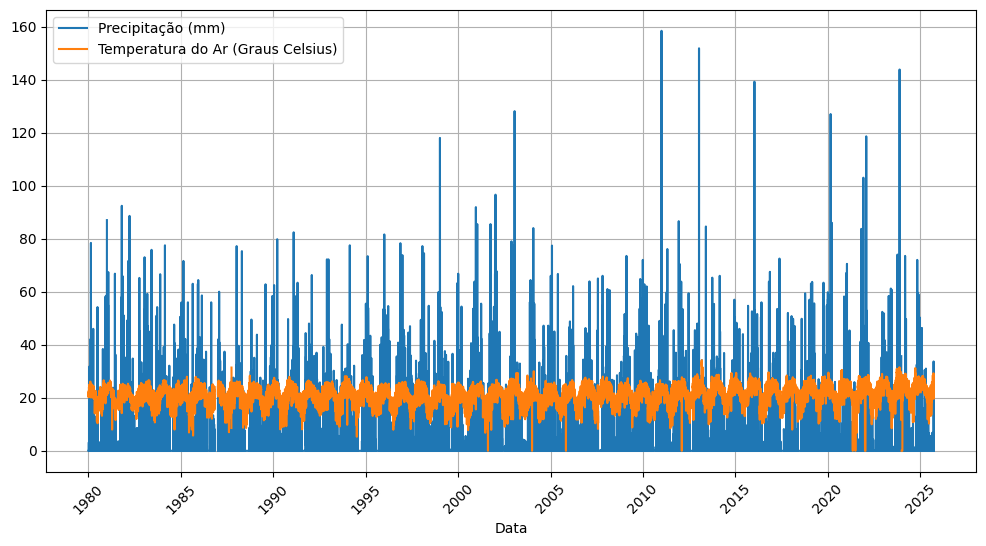

In [ ]:
# Gráfico com leituras diárias de precipitação e temperatura
plt.figure(figsize=(12,6))
plt.plot(df.index, df[variavel_precipitacao], label="Precipitação (mm)")
plt.plot(df.index, df[variavel_temperatura], label="Temperatura do Ar (Graus Celsius)")

# Adiciona título e rótulos
#plt.title("Série Temporal de Precipitação e Temperatura")
plt.xlabel("Data")
#plt.ylabel("Precipitação (mm)")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

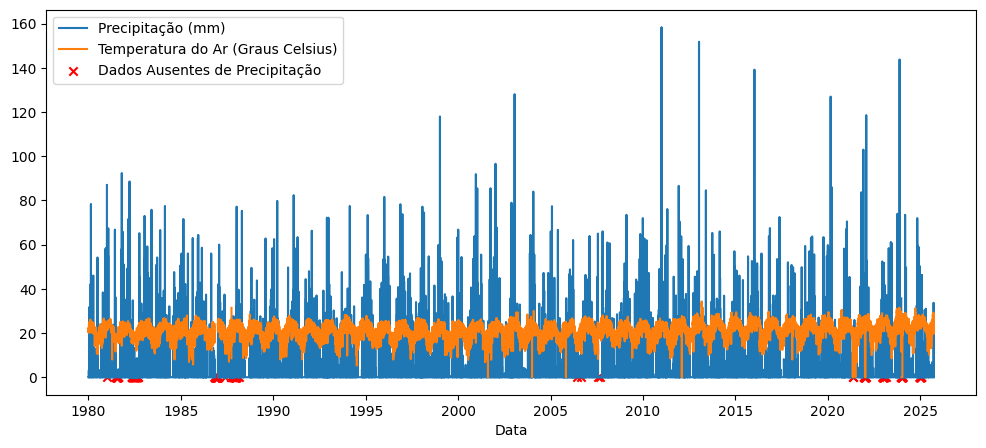

In [ ]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(df.index, df[variavel_precipitacao], label="Precipitação (mm)")
plt.plot(df.index, df[variavel_temperatura], label="Temperatura do Ar (Graus Celsius)")
plt.scatter(df.index[df[variavel_precipitacao].isna()], [0]*df[variavel_precipitacao].isna().sum(),
            color='red', label='Dados Ausentes de Precipitação', marker='x')
plt.legend()
#plt.title('Série Temporal com Dados Ausentes Marcados')
plt.xlabel("Data")
#plt.ylabel("Precipitação (mm)")
plt.show()



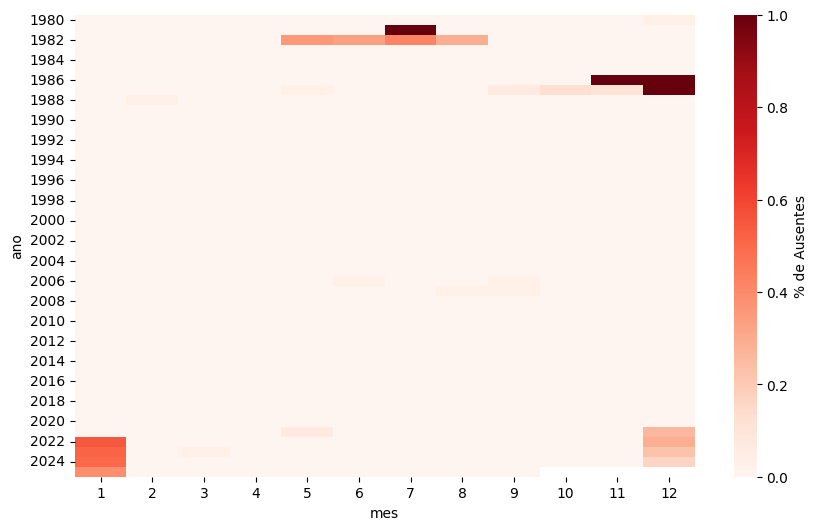

In [ ]:
# Cria tabela ano x mês, contando valores ausentes
df['ano'] = df.index.year
df['mes'] = df.index.month
pivot = df.pivot_table(values=variavel_precipitacao, index='ano', columns='mes',
                       aggfunc=lambda x: x.isna().mean())

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Reds', cbar_kws={'label': '% de Ausentes'})
#plt.title('Percentual de dados ausentes de preciptação por Ano e Mês')
plt.show()


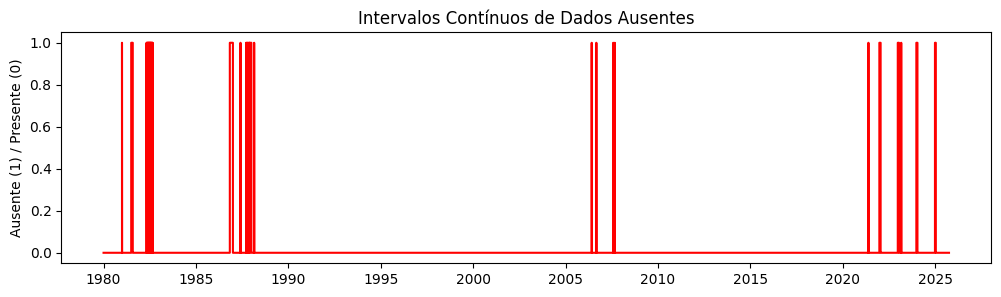

In [ ]:
is_na = df[variavel_precipitacao].isna()
plt.figure(figsize=(12,3))
plt.plot(df.index, is_na, drawstyle='steps-mid', color='red')
plt.title('Intervalos Contínuos de Dados Ausentes')
plt.ylabel('Ausente (1) / Presente (0)')
plt.show()


# Preenchimento dos dados faltantes com o cunjunto de dados ERA5

In [ ]:
# Dados ERA5
caminho_arquivo = "/content/drive/MyDrive/datasets/serie_tp_lat-22.1886_lon-47.9533_monte_alegre_era5_2015a2025.csv"

df_dados_era5 = pd.read_csv(caminho_arquivo, parse_dates=True, index_col=0)

# Ordena por data
df_dados_era5 = df_dados_era5.sort_values("valid_time")

df_dados_era5 = df_dados_era5.resample("D").agg({
    "tp": "sum",
    "tp_mm": "sum",
})

# Agregando a precipitação diária para a soma Mensal ('MS' - Month Start)
# A função 'sum()' é usada para somar a precipitação dentro de cada mês
df_dados_era5_mensal = df_dados_era5['tp_mm'].resample('MS').sum().to_frame()

df_dados_era5

,tp,tp_mm
valid_time,,
2015-01-01,1.519144e-03,1.519144
2015-01-02,1.875937e-03,1.875937
2015-01-03,3.991038e-03,3.991038
2015-01-04,8.438468e-03,8.438468
2015-01-05,1.255524e-02,12.555242
...,...,...
2025-10-13,1.434769e-02,14.347687
2025-10-14,3.470421e-03,3.470421
2025-10-15,3.579855e-04,0.357985


In [ ]:
df[variavel_precipitacao] = df[variavel_precipitacao].fillna(df_dados_era5["tp_mm"])

df

,yr,doy,tmax,tmin,tmean,tdavg,Wtmax,Wtmin,wsp05,wsp2,wsp10,evapA,evapS,rain,rad,insol,press,rh,ano,mes
data,,,,,,,,,,,,,,,,,,,,
1980-01-01,1980,1,26.0,17.6,21.80,22.1,NaN,NaN,NaN,NaN,NaN,4.26,NaN,0.0,370.18,05:00:00,NaN,69,1980,1
1980-01-02,1980,2,25.8,14.8,20.30,21.8,34,15,5.92,7.12,NaN,NaN,NaN,0.0,600.29,11:20:00,NaN,59.25,1980,1
1980-01-03,1980,3,27.2,13.2,20.20,22.4,28,12,3.36,3.57,NaN,7.12,NaN,0.0,610.29,11:50:00,NaN,42.5,1980,1
1980-01-04,1980,4,30.2,11.4,20.80,24,31,12,NaN,NaN,NaN,6.98,NaN,0.0,600.29,11:10:00,NaN,47.25,1980,1
1980-01-05,1980,5,31.0,14.2,22.60,25.2,NaN,NaN,NaN,NaN,NaN,6.98,NaN,0.0,600.29,09:05:00,NaN,50.75,1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-26,2025,269,27.1,12.1,19.60,20.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,321.800544,NaN,933.4,68.5,2025,9
2025-09-27,2025,270,30.3,14.9,22.60,77.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,334.042956,NaN,931.3,59,2025,9
2025-09-28,2025,271,33.7,18,25.85,26.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,321.800544,NaN,929.4,48.5,2025,9


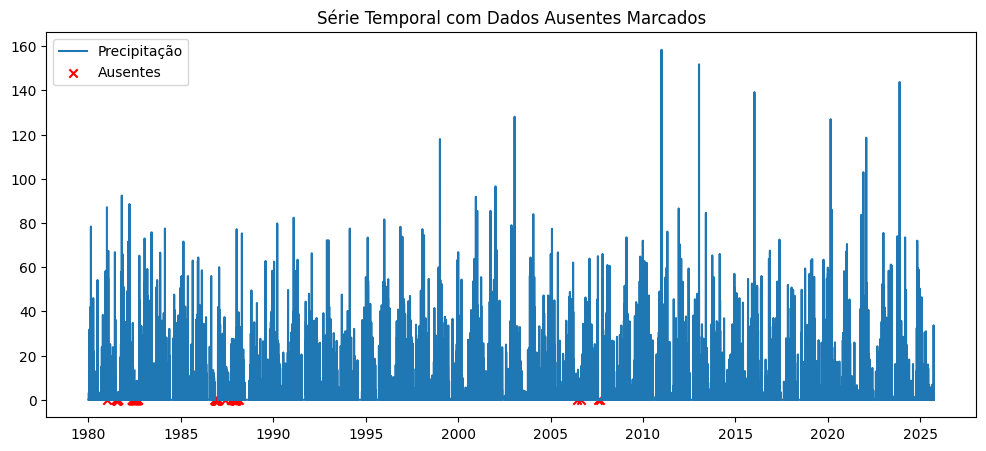

In [ ]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(df.index, df[variavel_precipitacao], label='Precipitação')
plt.scatter(df.index[df[variavel_precipitacao].isna()], [0]*df[variavel_precipitacao].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal com Dados Ausentes Marcados')
plt.show()

# Previsão futura

In [ ]:
# Agregando a precipitação diária para a soma Mensal ('MS' - Month Start)
# A função 'sum()' é usada para somar a precipitação dentro de cada mês
df_mensal = df[variavel_precipitacao].resample('MS').sum().to_frame()

df_mensal

,rain
data,
1980-01-01,131.6
1980-02-01,263.0
1980-03-01,90.2
1980-04-01,133.4
1980-05-01,11.4
...,...
2025-05-01,3.6
2025-06-01,53.0
2025-07-01,11.0


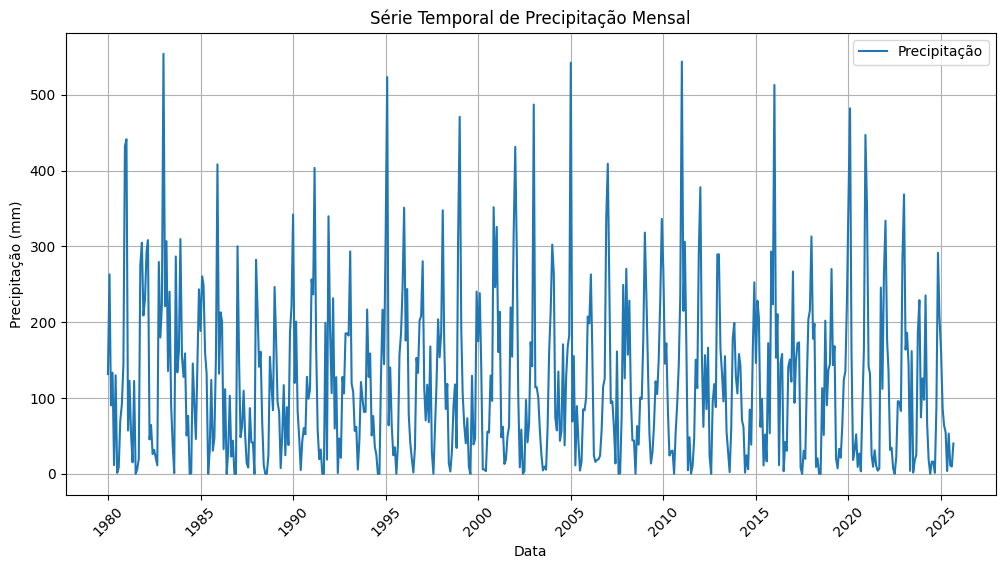

In [ ]:
# Cria o gráfico de precipitação mensal
plt.figure(figsize=(12,6))
plt.plot(df_mensal.index, df_mensal[variavel_precipitacao], label="Precipitação")

# Adiciona título e rótulos
plt.title("Série Temporal de Precipitação Mensal")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

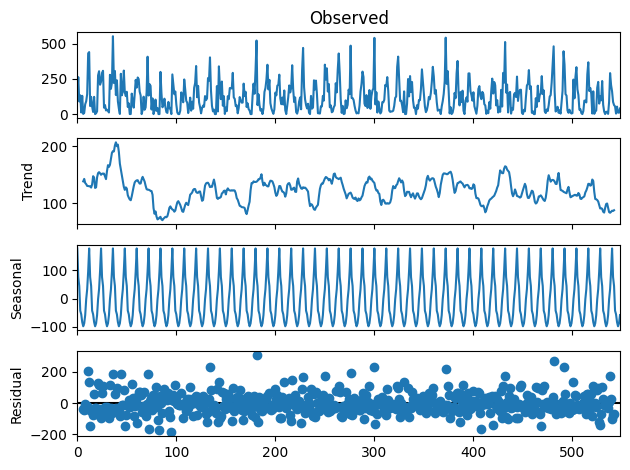

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

precipitacao_total = np.array(df_mensal[variavel_precipitacao])

result = seasonal_decompose(precipitacao_total, model='additive', period=12)
result.plot()

plt.show()

## 3. Previsão Futura para 5 anos

In [ ]:
# Definir intervalo para modelagem
inicio = "1980-01-01"
fim    = "2023-12-31"

df_modelagem = df_mensal.copy().loc[inicio:fim]

df_dados_reais_futuro = df_mensal.copy().loc[fim:]

In [ ]:
from pycaret.time_series import setup, compare_models, finalize_model, predict_model

# --- Configuração do PyCaret ---
# Inicializando o ambiente com os dados Mensais
# fh=60: Horizon of the forecast (60 meses, equivalente a cinco anos)
print("\nIniciando a Configuração do PyCaret (Dados Mensais)...")
s_mensal = setup(
    data = df_modelagem,
    target = variavel_precipitacao,
    fh = 60,
    session_id = 456,
    #ignore_prep_pipeline = True,
    #verbose = False
)

# --- Comparação e Seleção do Melhor Modelo (Mensal) ---
print("Comparando Modelos (Mensal)...")
# Usando 'seasonal_decompose' para tentar melhorar a decomposição sazonal
best_model_mensal = compare_models(
    fold = 3,
    round = 4, # Maior precisão na comparação
    #verbose = False
)

print(f"\n--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: {type(best_model_mensal).__name__} ---")

# --- Treinamento e Finalização do Melhor Modelo ---
final_model_mensal = finalize_model(best_model_mensal)

# --- Previsão Futura (Forecast) ---
# Gerando a previsão para 60 meses
predictions_mensal = predict_model(final_model_mensal)




Iniciando a Configuração do PyCaret (Dados Mensais)...


,Description,Value
0,session_id,456
1,Target,rain
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(528, 1)"
5,Transformed data shape,"(528, 1)"
6,Transformed train set shape,"(468, 1)"
7,Transformed test set shape,"(60, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Comparando Modelos (Mensal)...


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.6156,0.6169,47.0259,65.5311,5354951630795886.0000,0.5581,0.6046,3.0133
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6174,0.6163,47.1643,65.4699,5177869301333969.0000,0.5608,0.6051,1.7667
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6195,0.6186,47.3244,65.7144,5154103369979911.0000,0.5616,0.6026,1.4967
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6198,0.6254,47.3494,66.4481,4109712693555854.5000,0.5788,0.5946,1.8800
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.6200,0.6231,47.3622,66.1871,4454637465549426.0000,0.5880,0.5958,3.7600
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.6212,0.6194,47.4525,65.8013,5140428575250607.0000,0.5650,0.6014,2.1767
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6212,0.6194,47.4525,65.8013,5140428545912281.0000,0.5650,0.6014,1.9300
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6212,0.6194,47.4538,65.8022,5140310945330503.0000,0.5650,0.6013,2.0867
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6212,0.6194,47.4531,65.8017,5140378231597099.0000,0.5650,0.6013,1.6067
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6212,0.6194,47.4538,65.8022,5140310999053570.0000,0.5650,0.6013,1.4767


Processing:   0%|          | 0/117 [00:00<?, ?it/s]


--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: ExponentialSmoothing ---


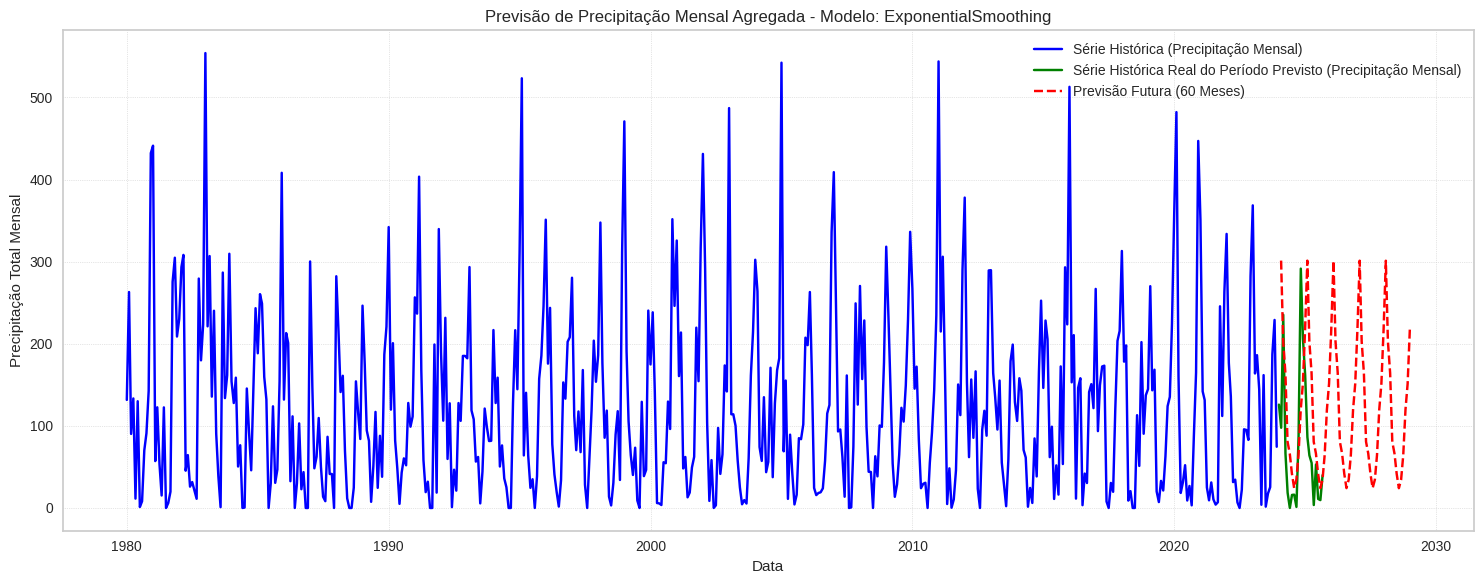

In [ ]:
# --- Visualização ---
# Gerando o gráfico de previsão Mensal
plt.figure(figsize=(15, 6))

# Série histórica (Dados Reais Mensais)
plt.plot(df_modelagem.index, df_modelagem[variavel_precipitacao], label='Série Histórica (Precipitação Mensal)', color='blue')

# Série histórica (Dados Reais Mensais)
plt.plot(df_dados_reais_futuro.index, df_dados_reais_futuro[variavel_precipitacao], label='Série Histórica Real do Período Previsto (Precipitação Mensal)', color='green')

# Previsão futura Mensal
plt.plot(predictions_mensal.index, predictions_mensal['y_pred'], label='Previsão Futura (60 Meses)', color='red', linestyle='--')

# Configurações do Gráfico
plt.title(f'Previsão de Precipitação Mensal Agregada - Modelo: {type(best_model_mensal).__name__}')
plt.xlabel('Data')
plt.ylabel('Precipitação Total Mensal')
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

# Exibindo os primeiros valores da previsão
#print("\nValores da previsão (60 meses):")
#print(predictions_mensal)